In [7]:
from pyvis.network import Network
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G=nx.Graph()
G.add_edges_from([(1,2),(1,3)])
G.add_nodes_from([1,2,3])

In [3]:
print(f'Nodes: {list(G.nodes)}')
print(f'Edges: {list(G.edges)}')

Nodes: [1, 2, 3]
Edges: [(1, 2), (1, 3)]


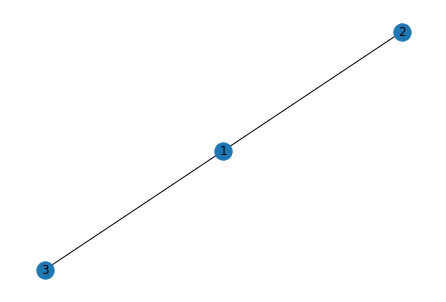

In [6]:
nx.draw(G, with_labels=True)

In [11]:
net=Network(notebook=True)
net.from_nx(G)
net.show("example.html")

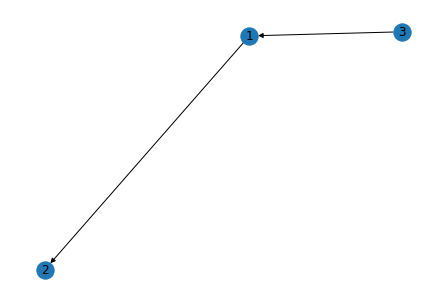

In [19]:
DG=nx.DiGraph()
DG.add_weighted_edges_from([(1,2,0.5),(3,1,2)])
DG.out_degree(1, weight='weight')
DG.degree(1,weight='weight')
nx.draw(DG, with_labels=True)

In [56]:
net=Network(notebook=True)
net.from_nx(DG)
net.add_node(4,size=40)
net.add_edge(4,1,weight=500)
net.show("directed_graph.html")

In [48]:
net.get_node(1)

{'size': 10, 'id': 1, 'label': 1, 'shape': 'dot'}

In [55]:
from pyvis.network import Network
import pandas as pd

got_net = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')

# set the physics layout of the network
got_net.barnes_hut()
got_data = pd.read_csv('https://www.macalester.edu/~abeverid/data/stormofswords.csv')

sources = got_data['Source']
targets = got_data['Target']
weights = got_data['Weight']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]

    got_net.add_node(src, src, title=src)
    got_net.add_node(dst, dst, title=dst)
    got_net.add_edge(src, dst, length=w)

neighbor_map = got_net.get_adj_list()

# add neighbor data to node hover data
for node in got_net.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

got_net.show('gameofthrones.html')